In [6]:
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
import seaborn as sns

In [8]:
df_DS_US = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].copy()

df_DS_US = df_DS_US.dropna(subset= ['salary_year_avg'])

In [9]:
df_DS_US = df_DS_US.explode('job_skills')
df_DS_US_group = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DS_top_pay = df_DS_US_group.sort_values(by='median', ascending=False).head(10)


In [10]:
df_DS_top_skills = df_DS_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

df_DS_top_skills

,count,median
job_skills,,
tensorflow,474,149646.0
spark,718,135959.5
sql,2463,134500.0
aws,768,134000.0
python,3358,131867.0
r,2053,126000.0
tableau,989,125000.0
hadoop,468,125000.0
excel,490,124290.0


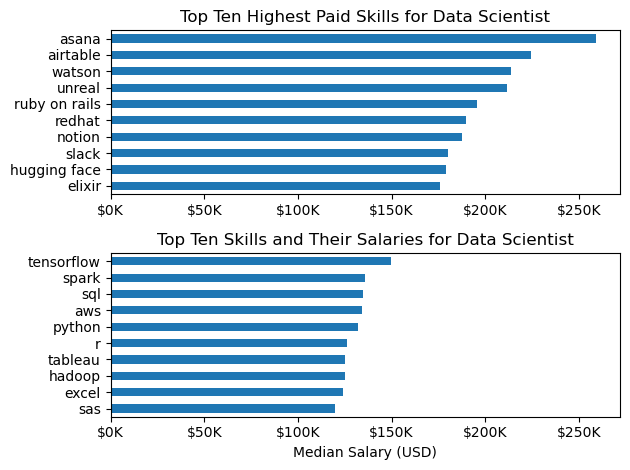

In [12]:
fig, ax = plt.subplots(2,1)

df_DS_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top Ten Highest Paid Skills for Data Scientist')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))



df_DS_top_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top Ten Skills and Their Salaries for Data Scientist')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))


fig.tight_layout()

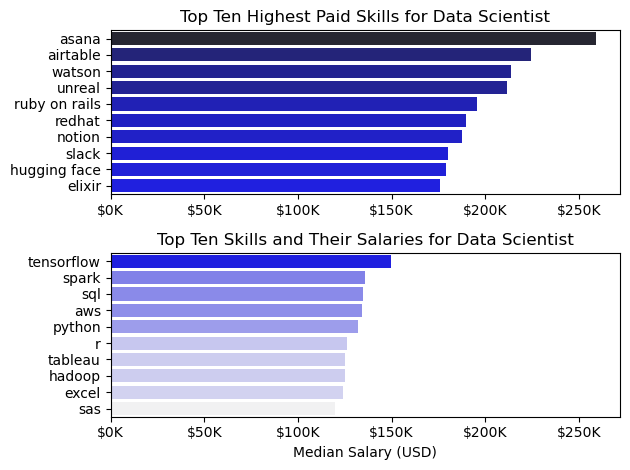

In [17]:
fig, ax = plt.subplots(2,1)

sns.barplot(data=df_DS_top_pay, x='median', y=df_DS_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

#df_DS_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
#ax[0].invert_yaxis()
ax[0].set_title('Top Ten Highest Paid Skills for Data Scientist')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))


sns.barplot(data=df_DS_top_skills, x='median', y=df_DS_top_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

#df_DS_top_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
#ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top Ten Skills and Their Salaries for Data Scientist')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))


fig.tight_layout()

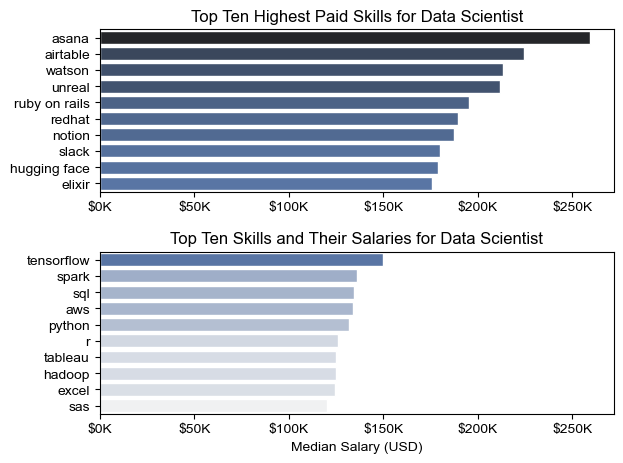

In [18]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DS_top_pay, x='median', y=df_DS_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

#df_DS_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
#ax[0].invert_yaxis()
ax[0].set_title('Top Ten Highest Paid Skills for Data Scientist')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))


sns.barplot(data=df_DS_top_skills, x='median', y=df_DS_top_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

#df_DS_top_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
#ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top Ten Skills and Their Salaries for Data Scientist')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))


fig.tight_layout()

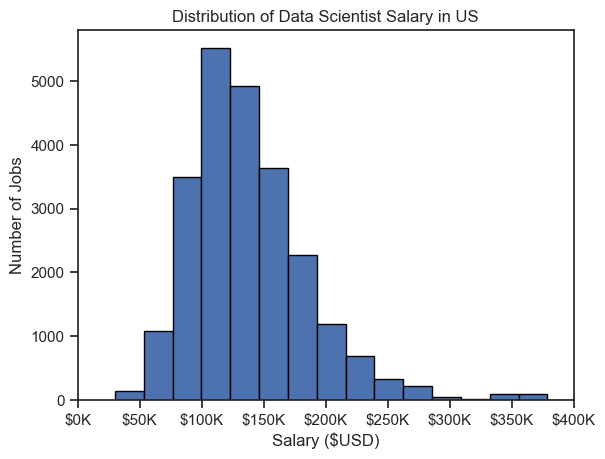

In [19]:
df_DS_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.title('Distribution of Data Scientist Salary in US')
plt.xlabel('Salary ($USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0, 400000)

ax = plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

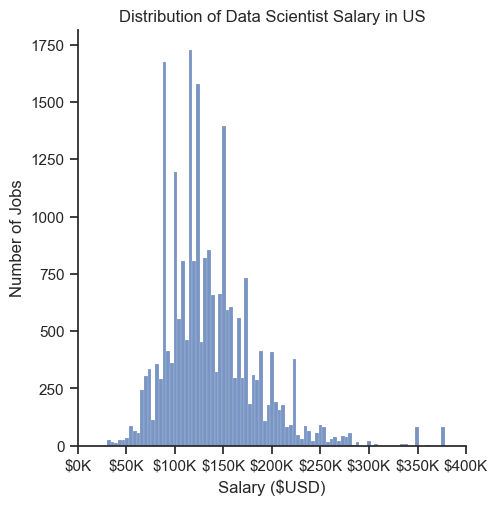

In [20]:

sns.displot(df_DS_US['salary_year_avg'])

plt.title('Distribution of Data Scientist Salary in US')
plt.xlabel('Salary ($USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0, 400000)

ax = plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

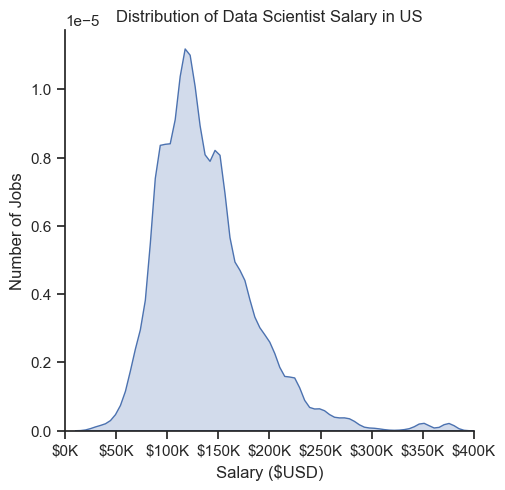

In [22]:

sns.displot(df_DS_US['salary_year_avg'], kind='kde', fill=True)

plt.title('Distribution of Data Scientist Salary in US')
plt.xlabel('Salary ($USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0, 400000)

ax = plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

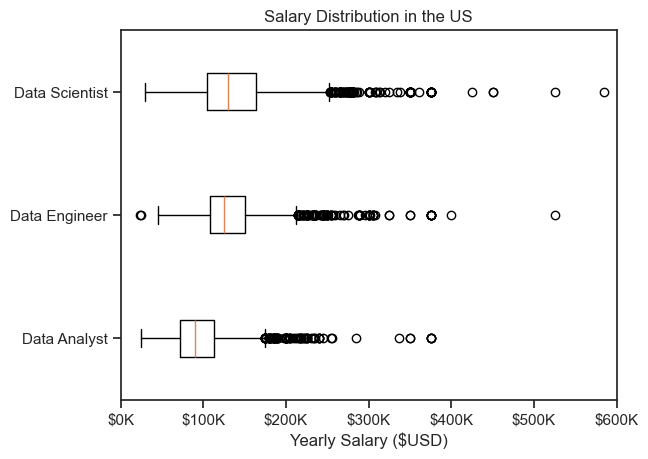

In [23]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()


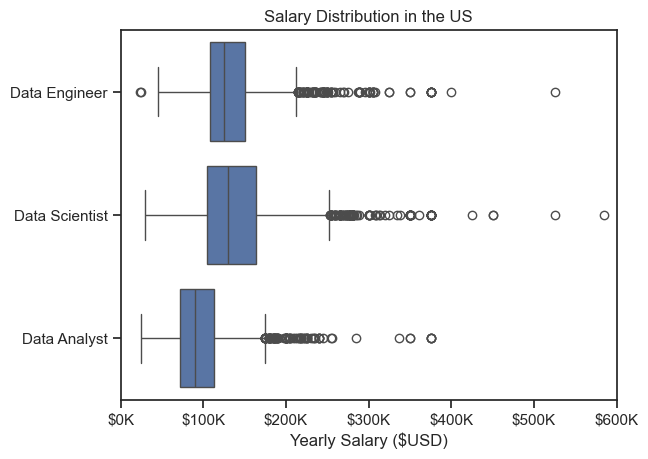

In [25]:

sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()
